In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [7]:
df = datasets.load_iris()
# df.head()

In [8]:
X = df.data[:,0:2]
y= df.target

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
def knn_predict(p, X, outcomes, k = 5): 
    ind = find_nearest_neighbours(p, X, k) 
    return majority_vote(outcomes[ind]) 
  
outcomes = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1]) 
knn_predict(np.array([2.5, 2.7]), X, outcomes, k = 2) 




def make_prediction_grid(X, y1, limits, h, k): 
    (x_min, x_max, y_min, y_max) = limits 
    xs = np.arange(x_min, x_max, h) 
    ys = np.arange(y_min, y_max, h) 
    xx, yy = np.meshgrid(xs, ys) 
  
    prediction_grid = np.zeros(xx.shape, dtype = int) 
    for i, x in enumerate(xs): 
        for j, y in enumerate(ys): 
            p = np.array([x, y]) 
            prediction_grid[j, i] = knn_predict(p, X, y1, k) 
    return (xx, yy, prediction_grid) 
  
def plot_prediction_grid (xx, yy, prediction_grid, filename): 
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap 
    background_colormap = ListedColormap (["hotpink", "lightskyblue", "yellowgreen"]) 
    observation_colormap = ListedColormap (["red", "blue", "green"]) 
    plt.figure(figsize =(10, 10)) 
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5) 
    plt.scatter(X[:, 0], X [:, 1], c = y1, cmap = observation_colormap, s = 50) 
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2') 
    plt.xticks(()); plt.yticks(()) 
    plt.xlim (np.min(xx), np.max(xx)) 
    plt.ylim (np.min(yy), np.max(yy)) 
    plt.savefig(filename)

NameError: name 'find_nearest_neighbours' is not defined

NameError: name 'knn_predict' is not defined

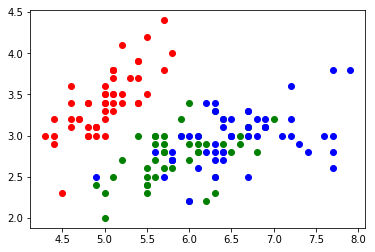

In [14]:
plt.plot(X[y == 0][:,0],X[y == 0][:,1],"ro")
plt.plot(X[y == 1][:,0],X[y == 1][:,1],"go")
plt.plot(X[y == 2][:,0],X[y == 2][:,1],"bo")

K=5
filename = 'iris_grid.pdf'
limits = (4,8,1.5,4.5)
h = 0.1

(xx,yy, pred) = make_prediction_grid(X,y,limits,h,K)
plot_prediction_grid(xx,yy,pred,filename)
plt.show()

